<a href="https://colab.research.google.com/github/Renata1027/python-/blob/main/1_Titanic%EF%BC%88%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 一：数据加载与初探

### 1.数据加载

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
!fc-cache -fv
# 获取 Matplotlib 缓存目录
cache_dir = mpl.get_cachedir()
print(f"Matplotlib cache directory: {cache_dir}")

# 删除缓存文件 (如果存在)
font_cache_file = os.path.join(cache_dir, 'fontlist-v330.json') # 版本号可能不同，请注意查看
if os.path.exists(font_cache_file):
    os.remove(font_cache_file)
    print("Matplotlib font cache removed.")

# 设置中文显示字体，优先使用 'WenQuanYi Micro Hei'，如果失败则尝试其他字体
plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'SimHei', 'Arial Unicode MS']
# 解决负号显示为方框的问题
plt.rcParams['axes.unicode_minus'] = False



/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded
Matplotlib cache directory: /root/.cache/matplotlib


In [ ]:
# 两种加载数据法

# 1.从kaggle官网下载数据存储到本地csv文件后读取本地文件
fpath = "D:/kaggle数据集/titanic/train.csv"
# fpath = "D:/kaggle数据集/titanic/train.csv"
df = pd.read_csv(fpath)
#
df = pd.read_csv("D:/kaggle数据集/titanic/train.csv")
# colab不支持，可以在pycharm/vscode等本地编译器用这种方法

In [ ]:
# 2.从seaborn库导出
# 加载Titanic数据集
df = sns.load_dataset('titanic') #自己定义名称，datafram

# 查看前5行数据
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### 2.数据描述

In [ ]:
# 查看数据形状，返回行列
print(df.shape)

# 查看列名列表
print(df.columns)
# 查看索引列
print(df.index)
# 数据类型
print(df.dtypes)

(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
RangeIndex(start=0, stop=891, step=1)
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


### 3.DataFrame 介绍
* dataframe:二维数据，整个表格 多行多列。不止由行索引，也有列索引，可以被看成由series组成的字典
* series:一维数据，一行或一列,类似数组的对象，由一组数据（不同数据类型）以及一组与之相关的数据标签（索引）组成

查看数据的方法：

1. df.loc 根据行列标签值查询（也可以覆盖写入）
2. df.iloc 根据行列数字位置查询
3. df.where
4. df.query

In [ ]:
# 数值区间范围查询
print(df.loc[1:15,"survived":"age"])

#
print(df.loc[8,"age"])

    survived  pclass     sex   age
1          1       1  female  38.0
2          1       3  female  26.0
3          1       1  female  35.0
4          0       3    male  35.0
5          0       3    male   NaN
6          0       1    male  54.0
7          0       3    male   2.0
8          1       3  female  27.0
9          1       2  female  14.0
10         1       3  female   4.0
11         1       1  female  58.0
12         0       3    male  20.0
13         0       3    male  39.0
14         0       3  female  14.0
15         1       2  female  55.0
27.0


In [ ]:
# 条件查询法
print(df.loc[(df["survived"] == 1) & (df["pclass"] >= 2),:])

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
2           1       3  female  26.0      0      0   7.9250        S   Third   
8           1       3  female  27.0      0      2  11.1333        S   Third   
9           1       2  female  14.0      1      0  30.0708        C  Second   
10          1       3  female   4.0      1      1  16.7000        S   Third   
15          1       2  female  55.0      0      0  16.0000        S  Second   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
866         1       2  female  27.0      1      0  13.8583        C  Second   
869         1       3    male   4.0      1      1  11.1333        S   Third   
874         1       2  female  28.0      1      0  24.0000        C  Second   
875         1       3  female  15.0      0      0   7.2250        C   Third   
880         1       2  female  25.0      0      1  26.0000        S  Second   

       who  adult_male deck  embark_town alive  alo

In [ ]:
# 调用函数
df.loc[lambda df : (df["survived"] == 1) & (df["pclass"] >= 2),:]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,1,2,female,27.0,1,0,13.8583,C,Second,woman,False,NaN,Cherbourg,yes,False
869,1,3,male,4.0,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True


In [ ]:
# 描述性统计
print(df.describe())
print('===================')
print(df.describe)
print('===================')
print(df.info())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
<bound method NDFrame.describe of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  fema

value_counts() 详解：
功能：统计某列中每个唯一值出现的次数

常用参数：

sort=True：按计数降序排序（默认）

normalize=True：返回比例而非计数

ascending=True：升序排列

bins：对数值型数据分组统计

In [ ]:
# 统计存活人舱位等级分布占比
survived_df = df[df['survived'] == 1]
class_distribution = survived_df['pclass'].value_counts()
class_percent = survived_df['pclass'].value_counts(normalize =True) * 100
print(class_percent.round(1).astype(str)+'%')

pclass
1    39.8%
3    34.8%
2    25.4%
Name: proportion, dtype: object


## 二：数据清洗预处理


### 1.缺失值处理

1. 识别缺失值：df.isnull().sum()
2. 填充方法：均值填充 df['Age'].fillna(df['Age'].mean())
3. 删除列：df.drop('Cabin', axis=1)

In [ ]:
print("原始数据集形状:", df.shape)
print("\n原始缺失值统计:")
print(df.isnull().sum())

原始数据集形状: (891, 15)

原始缺失值统计:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


drop(): 删除行或列

axis=1: 表示删除列（axis=0为删除行）

注意：在seaborn数据集中，客舱列名为'deck

In [ ]:
# 2. 用中位数填充年龄缺失值
age_median = df['age'].median()
print(f"\n年龄中位数: {age_median:.1f} 岁")
df['age'] = df['age'].fillna(age_median) #fillnall


年龄中位数: 28.0 岁


In [ ]:
# 3. 删除"Cabin"列
df = df.drop('deck', axis=1)  # 注意：seaborn数据集中的Cabin列名为'deck'

### 2.异常值处理
1. 箱线图识别：plt.boxplot(df['Fare'])
2. IQR法处理：
python<br>Q1 = df['Fare'].quantile(0.25)<br>Q3 = df['Fare'].quantile(0.75)<br>df = df[(df['Fare'] > Q1-1.5*(Q3-Q1)) & (df['Fare'] < Q3+1.5*(Q3-Q1))]<br>

/tmp/ipython-input-25-759538097.py:23: UserWarning: Glyph 31080 (\N{CJK UNIFIED IDEOGRAPH-7968}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-25-759538097.py:23: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-25-759538097.py:23: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-25-759538097.py:23: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-25-759538097.py:23: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-25-759538097.py:23: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-25-759538097.py:23: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAP


票价异常值边界: 下限=-26.72, 上限=65.63


/tmp/ipython-input-25-759538097.py:24: UserWarning: Glyph 22788 (\N{CJK UNIFIED IDEOGRAPH-5904}) missing from font(s) DejaVu Sans.
  plt.savefig('fare_boxplot_comparison.png', dpi=300)
/tmp/ipython-input-25-759538097.py:24: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) DejaVu Sans.
  plt.savefig('fare_boxplot_comparison.png', dpi=300)
/tmp/ipython-input-25-759538097.py:24: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from font(s) DejaVu Sans.
  plt.savefig('fare_boxplot_comparison.png', dpi=300)
/tmp/ipython-input-25-759538097.py:24: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.savefig('fare_boxplot_comparison.png', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31080 (\N{CJK UNIFIED IDEOGRAPH-7968}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/p

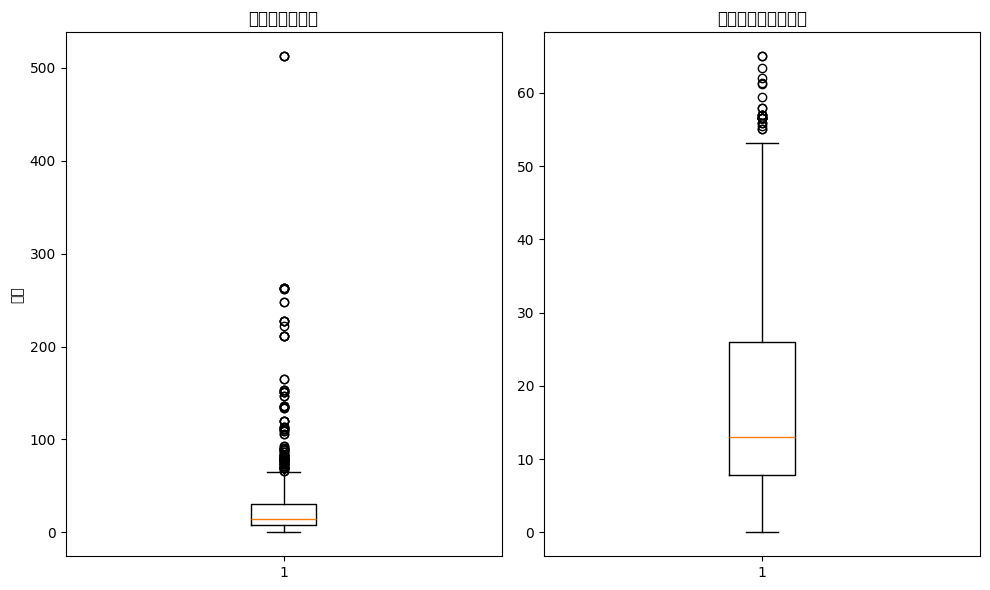

In [ ]:
# 4. 异常值检测 - 票价(Fare)
plt.figure(figsize=(10, 6)) #画布
plt.subplot(1, 2, 1) # 子图
plt.boxplot(df['fare'].dropna()) # dropnall 图形绘图
plt.title('原始票价箱线图')
plt.ylabel('票价')
# 5. 使用IQR法处理票价异常值
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
# 计算异常值边界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"\n票价异常值边界: 下限={lower_bound:.2f}, 上限={upper_bound:.2f}")

# 筛选保留范围内的数据
df_cleaned = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

# 可视化处理结果
plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['fare'])
plt.title('处理后的票价箱线图')
plt.tight_layout() # 紧凑布局
plt.savefig('fare_boxplot_comparison.png', dpi=300)
plt.show()

箱线图直观展示：

箱体：25%-75%数据范围（IQR）

中线：中位数

须线：1.5×IQR范围

点：超出须线的异常值

IQR（四分位距）：Q3-Q1，衡量数据离散程度

1.5×IQR是识别温和异常值的常用阈值

保留在 [Q1-1.5×IQR, Q3+1.5×IQR] 范围内的数据


票价异常值边界: 下限=-26.72, 上限=65.63


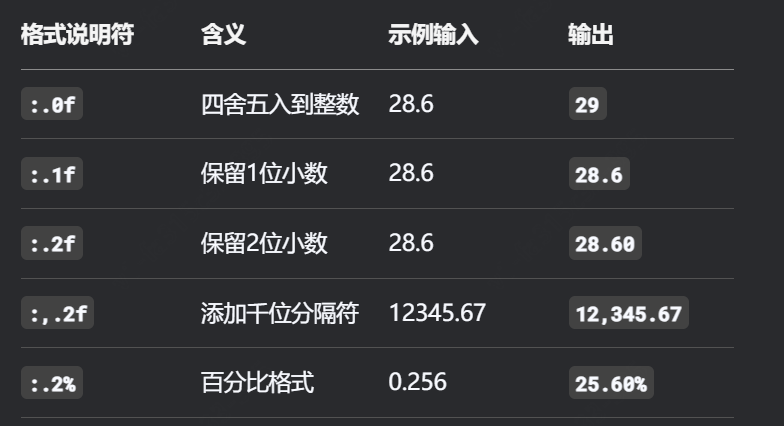

/tmp/ipython-input-24-3969734572.py:5: UserWarning: Glyph 22788 (\N{CJK UNIFIED IDEOGRAPH-5904}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-24-3969734572.py:5: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-24-3969734572.py:5: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-24-3969734572.py:5: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-24-3969734572.py:5: UserWarning: Glyph 31080 (\N{CJK UNIFIED IDEOGRAPH-7968}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-24-3969734572.py:5: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-24-3969734572.py:5: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAP

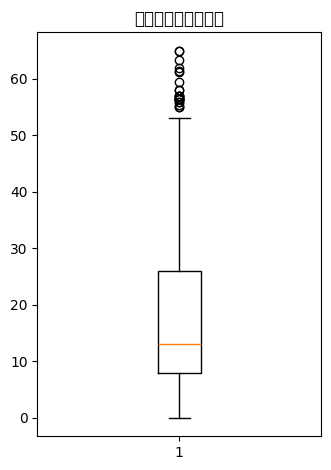

In [ ]:
# 6. 结果验证
print("\n清洗后数据集形状:", df_cleaned.shape)
print("\n清洗后缺失值统计:")
print(df_cleaned.isnull().sum())


清洗后数据集形状: (775, 14)

清洗后缺失值统计:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [ ]:
# 7. 保存清洗后的数据
df_cleaned.to_csv('titanic_cleaned.csv', index=False)
df_cleaned.to_csv('D:/titanic_cleaned.csv', index=False) # 不需要索引列
print("\n清洗后的数据已保存为 'titanic_cleaned.csv'")


清洗后的数据已保存为 'titanic_cleaned.csv'


1. 缺失值处理策略
* 删除列：缺失率高(>70%)或无分析价值；优点：简单直接；缺点：损失潜在信息。

* 中位数填充：数值型变量，存在异常值；优点：不受异常值影响；缺点：忽略数据分布。

* 均值填充：数值型变量，分布均匀；优点：保持数据均值不变；缺点：受异常值影响大。

* 众数填充：分类变量；优点：保持类别比例；缺点：可能引入偏差。

* 插值法：时间序列数据；优点：利用数据趋势；缺点：计算复杂


2. IQR法异常值检测


IQR（四分位距）是统计学中衡量数据离散度的稳健指标：



```
IQR = Q3 - Q1
异常值边界：
  下限 = Q1 - 1.5 × IQR
  上限 = Q3 + 1.5 × IQR
```


Q1：第25百分位数（数据排序后前25%的位置）

Q3：第75百分位数（数据排序后前75%的位置）

1.5倍IQR规则：约***99.3%***的正态分布数据会落在此范围内

3. 箱线图解读

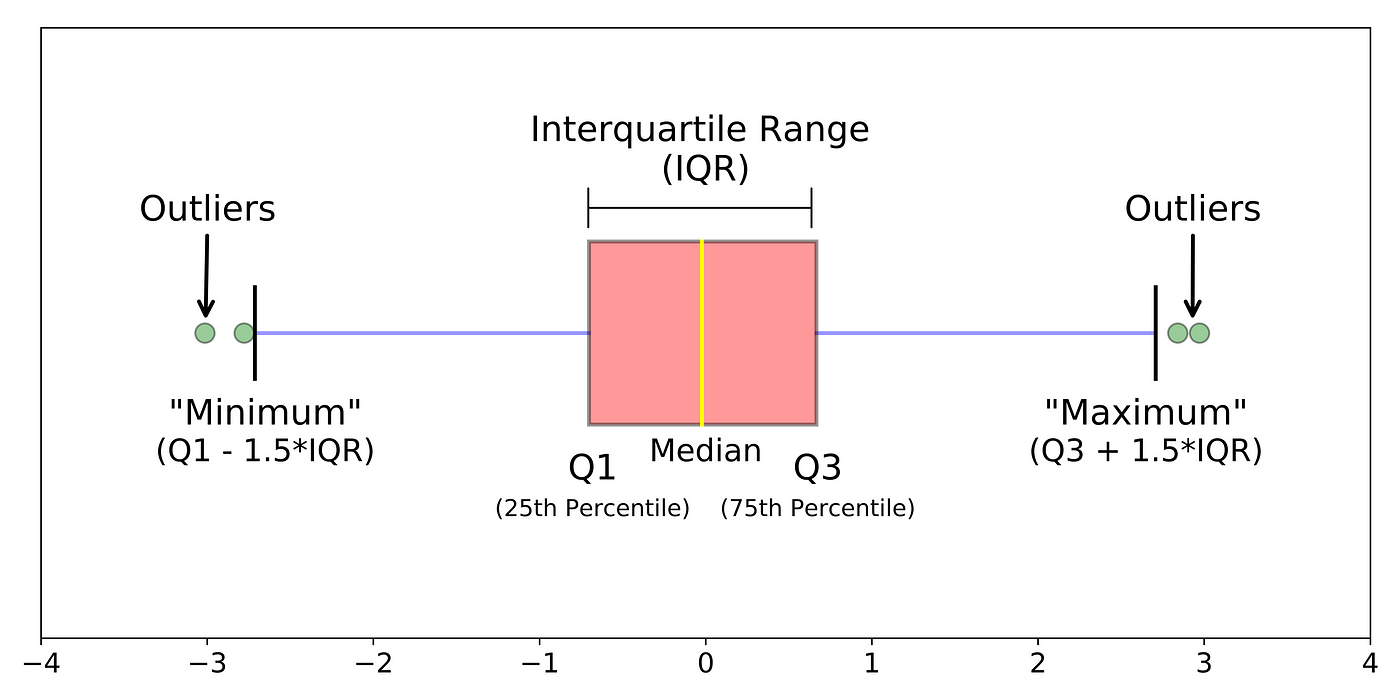

## 三：数据可视化


### 1.柱状图：分类对比
	sns.barplot(x='Pclass', y='Survived', data=df)

In [ ]:
# 设置可视化风格
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

/tmp/ipython-input-58-170859428.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


(0.0, 1.0)

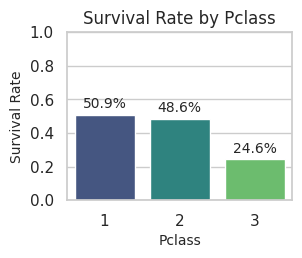

In [ ]:
# ====================
# 任务1: 不同舱位的幸存率对比
# ====================
plt.subplot(2, 2, 1)
sns.barplot(
    x='pclass',
    y='survived',
    data=df_cleaned,
    estimator=np.mean,
    palette="viridis",
    errorbar=None  # 不显示误差条
)
# 添加精确百分比标签
pclass_survival = df_cleaned.groupby('pclass')['survived'].mean().reset_index()
for index, row in pclass_survival.iterrows():
    plt.text(
        row['pclass']-1,  # x位置（索引从0开始）
        row['survived']+0.02,  # y位置
        f"{row['survived']*100:.1f}%",
        ha='center',  # 水平对齐方式
        va='bottom',  # 垂直对齐方式
        fontsize=10,  # 字体大小
    )

plt.title('Survival Rate by Pclass',fontsize = 12)  # 设置标题
plt.xlabel('Pclass', fontsize = 10)  # 设置x轴标签
plt.ylabel('Survival Rate', fontsize = 10)  # 设置y轴标签
plt.ylim(0, 1)  # 设置y轴范围

### 2.箱线图：分布关系


```
sns.boxplot(
    x='survived',
    y='age',
    data=df_cleaned,)
```



/tmp/ipython-input-59-4211956084.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


([<matplotlib.axis.XTick at 0x79f15bd3bd90>,
 [Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')])

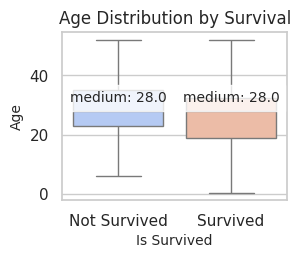

In [ ]:
# ====================
# 任务2: 年龄与幸存率的关系
# ====================
plt.subplot(2, 2, 2)
sns.boxplot(
    x='survived',
    y='age',
    data=df_cleaned,
    palette="coolwarm",
    showfliers=False  # 不显示异常值
)

# 添加中位数值标签
survived_age = df_cleaned.groupby('survived')['age'].median().reset_index()
for index, row in survived_age.iterrows():
    plt.text(
        row['survived'],  # x位置
        row['age']+2,  # y位置
        f"medium: {row['age']:.1f}",
        ha='center',  # 水平对齐方式
        va='bottom',  # 垂直对齐方式
        fontsize=10,  # 字体大小
        bbox=dict(facecolor='white', alpha=0.8)
    )

plt.title('Age Distribution by Survival', fontsize = 12)  # 设置标题
plt.xlabel('Is Survived', fontsize = 10)  # 设置x轴标签
plt.ylabel('Age', fontsize = 10)  # 设置y轴标签
plt.xticks([0, 1], ['Not Survived', 'Survived'])  # 设置x轴刻度标签

### 3.热力图：相关性分析

```
sns.heatmap(df.corr(), annot=True)
```



(array([0.5]), [Text(0, 0.5, 'survived')])

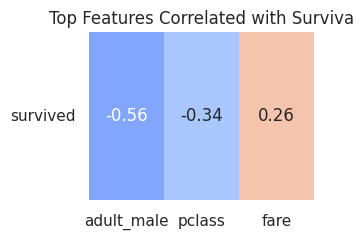

In [ ]:
# ====================
# 任务3: 特征相关性分析
# ====================
# 计算相关性
corr_matrix = df.corr(numeric_only=True)
survived_corr = corr_matrix['survived'].abs().sort_values(ascending=False)

# 提取与幸存率相关性最高的3个特征
top_features = survived_corr.index[1:4]  # 排除自身
top_corr_values = survived_corr.values[1:4]

plt.subplot(2, 2, 3)
sns.heatmap(
    corr_matrix.loc[['survived'], top_features],
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cbar=False
)
plt.title('Top Features Correlated with Surviva', fontsize=12)
plt.yticks(rotation=0)


/tmp/ipython-input-61-2682590719.py:26: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-61-2682590719.py:26: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-61-2682590719.py:26: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-61-2682590719.py:26: UserWarning: Glyph 33329 (\N{CJK UNIFIED IDEOGRAPH-8231}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-61-2682590719.py:26: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-61-2682590719.py:26: UserWarning: Glyph 31561 (\N{CJK UNIFIED IDEOGRAPH-7B49}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-61-2682590719.py:26: UserWarning: Glyph 32423 (\N{CJK UNIFIED I

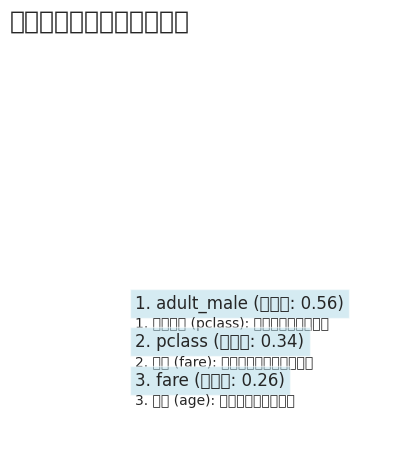

In [ ]:
# 添加特征重要性解释
plt.subplot(2, 2, 4)
plt.axis('off')  # 隐藏坐标轴

# 创建解释文本
feature_explanations = [
    "1. 舱位等级 (pclass): 头等舱乘客优先获救",
    "2. 票价 (fare): 高票价乘客生存机会更高",
    "3. 年龄 (age): 儿童和老人优先获救"
]

for i, (feature, corr) in enumerate(zip(top_features, top_corr_values)):
    plt.text(
        0.1, 0.8 - i*0.2,
        f"{i+1}. {feature} (相关性: {corr:.2f})",
        fontsize=12,
        bbox=dict(facecolor='lightblue', alpha=0.5)
    )
    plt.text(
        0.1, 0.7 - i*0.2,
        feature_explanations[i],
        fontsize=10
    )
plt.rcParams['font.family'] = 'Heiti TC'
plt.suptitle('泰坦尼克号幸存者特征分析', fontsize=18)
plt.tight_layout()
plt.savefig('titanic_analysis.png', dpi=300)
plt.show()

### 4.高级可视化技巧总结

In [ ]:
# 1. 增强柱状图可读性

# 添加精确百分比标签
for index, row in pclass_survival.iterrows():
    plt.text(row['pclass']-1, row['survived']+0.02, f"{row['survived']*100:.1f}%", ...)

In [ ]:
# 2. 优化箱线图展示


sns.boxplot(showfliers=False)  # 隐藏异常值点
# 添加中位数标注
plt.text(row['survived'], row['age']-2, f"中位数: {row['age']:.1f}岁", ...)

In [ ]:
# 3. 专业相关性展示

# 使用热力图展示关键特征相关性
sns.heatmap(corr_matrix.loc[['survived'], top_features], annot=True, ...)

In [ ]:
# 4. 添加业务解释

# 创建特征重要性解释
feature_explanations = [
    "1. 舱位等级 (pclass): 头等舱乘客优先获救",
    "2. 票价 (fare): 高票价乘客生存机会更高",
    "3. 年龄 (age): 儿童和老人优先获救"
]

## 四：数学建模-逻辑回归


### 1.数学原理

**核心概念**

逻辑回归是一种分类算法（常用于二分类），通过Sigmoid函数将线性回归结果映射到[0,1]区间，表示概率：


---


**工作流程**

输入特征 → 2. 线性组合 → 3. Sigmoid函数 → 4. 概率输出

---

**线性组合（决策函数）**



 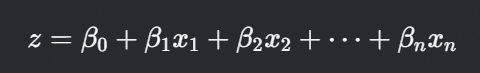

$\beta_0$：截距项（bias）

$\beta_1$到$\beta_n$：特征权重

$x_1$到$x_n$：输入特征值

---

**Sigmoid函数（概率转换）**


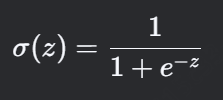

Sigmoid函数特性：

输入：任意实数（$-\infty$到$+\infty$）

输出：0到1之间的概率值

当$z=0$时，$\sigma(z)=0.5$

当$z \to +\infty$时，$\sigma(z) \to 1$

当$z \to -\infty$时，$\sigma(z) \to 0$

---

**损失函数（交叉熵）**

*为什么需要损失函数？*

* 衡量模型预测值与真实值的差距

* 指导模型如何调整参数（$\beta$值）以提升准确性

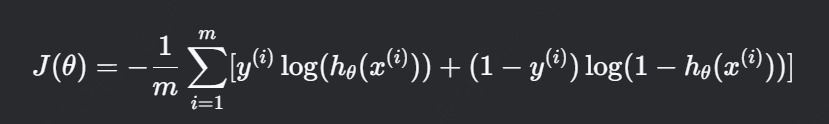

**理解交叉熵：**

1. 当$y=1$时：损失 = $-\log(h_{\beta}(x))$

* 预测概率$h_{\beta}(x)$越接近1，损失越小

* 预测概率$h_{\beta}(x)$越接近0，损失越大（趋近无穷）

2. 当$y=0$时：损失 = $-\log(1-h_{\beta}(x))$

* 预测概率$h_{\beta}(x)$越接近0，损失越小

* 预测概率$h_{\beta}(x)$越接近1，损失越大

---

**参数优化**

目标： 找到使损失函数$J(\beta)$最小化的$\beta$值

梯度下降原理：

随机初始化$\beta$值

计算损失函数的梯度（导数）

沿梯度反方向更新$\beta$值

重复2-3步直到收敛

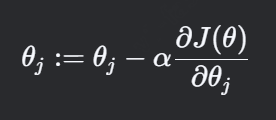

公式解析：

$\alpha$：学习率（learning rate），控制更新步长

$\frac{\partial J(\beta)}{\partial \beta_j}$：损失函数对$\beta_j$的偏导数

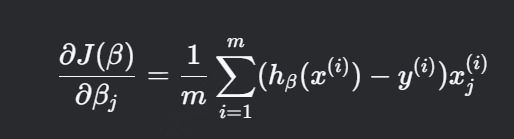

**直观理解：**

更新量 = 学习率 × (预测值 - 真实值) × 特征值

当预测值 > 真实值时：减小$\beta_j$

当预测值 < 真实值时：增大$\beta_j$

### 2.代码介绍

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# 加载数据
df = sns.load_dataset('titanic')
# 特征工程
features = ['pclass', 'age', 'fare', 'sex']  # 包含性别特征
X = df[features]
y = df['survived']
# 数据预处理
X_median = X.copy()
X_median['age'].fillna(X_median['age'].median(), inplace=True)
# 性别特征转换（字符串转数值）
X_median['sex'] = X_median['sex'].map({'male': 0, 'female': 1})

/tmp/ipython-input-34-595339618.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_median['age'].fillna(X_median['age'].median(), inplace=True)


In [ ]:
# 划分数据集
X_train_median, X_test_median, y_train, y_test = train_test_split(
    X_median,
    y,
    test_size=0.2,
    random_state=42  # 固定随机种子，确保每次分割结果相同
)

* 训练集：80%（学习模式）

* 测试集：20%（评估性能）

* random_state：确保结果可复现

In [ ]:
# 特征缩放（提高模型性能）
scaler = StandardScaler() # 创建标准化器对象
X_train_median_scaled = scaler.fit_transform(X_train_median) # 对训练集进行拟合和转换
X_test_median_scaled = scaler.transform(X_test_median) # 对测试集进行转换（使用训练集的参数）


**为什么需要特征缩放？**

* 逻辑回归使用梯度下降优化

* 特征尺度差异大会导致收敛速度慢

* 年龄(0-80)和票价(0-512)尺度差异大

**工作原理：**

标准化分数



> z = (x - μ) / σ


**不同的缩放方法：**

* StandardScaler：(x-μ)/σ——数据近似正态分布

* MinMaxScaler：(x-min)/(max-min)——数据有固定边界

* RobustScaler：(x-median)/IQR——数据有异常值

In [ ]:
# 模型训练
model_median = LogisticRegression(max_iter=1000)
model_median.fit(X_train_median_scaled, y_train)

LogisticRegression(max_iter=1000)

* max_iter：最大迭代次数（默认100可能不够）

* 默认使用L2正则化防止过拟合

In [ ]:
# 预测评估
y_pred_median = model_median.predict(X_test_median_scaled)

In [ ]:
# 结果对比
print("===== 中位数填充结果 =====")
print(f"准确率: {accuracy_score(y_test, y_pred_median):.4f}")
print("混淆矩阵:")
print(confusion_matrix(y_test, y_pred_median))
print("分类报告:")
print(classification_report(y_test, y_pred_median))

===== 中位数填充结果 =====
准确率: 0.7933
混淆矩阵:
[[89 16]
 [21 53]]
分类报告:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



**评估指标解读：**

准确率：正确预测的比例

**混淆矩阵：**



```
[[TP FP]
 [TN FN]]
```



**分类报告：**

* 精确率(Precision)：TP/(TP+FP)

* 召回率(Recall)：TP/(TP+FN)

* F1分数：精确率和召回率的调和平均

/tmp/ipython-input-40-2378160075.py:11: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-40-2378160075.py:11: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-40-2378160075.py:11: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-40-2378160075.py:11: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-40-2378160075.py:11: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-40-2378160075.py:11: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-40-2378160075.py:11: UserWarning: Glyph 36923 (\N{CJK UNIFIED I

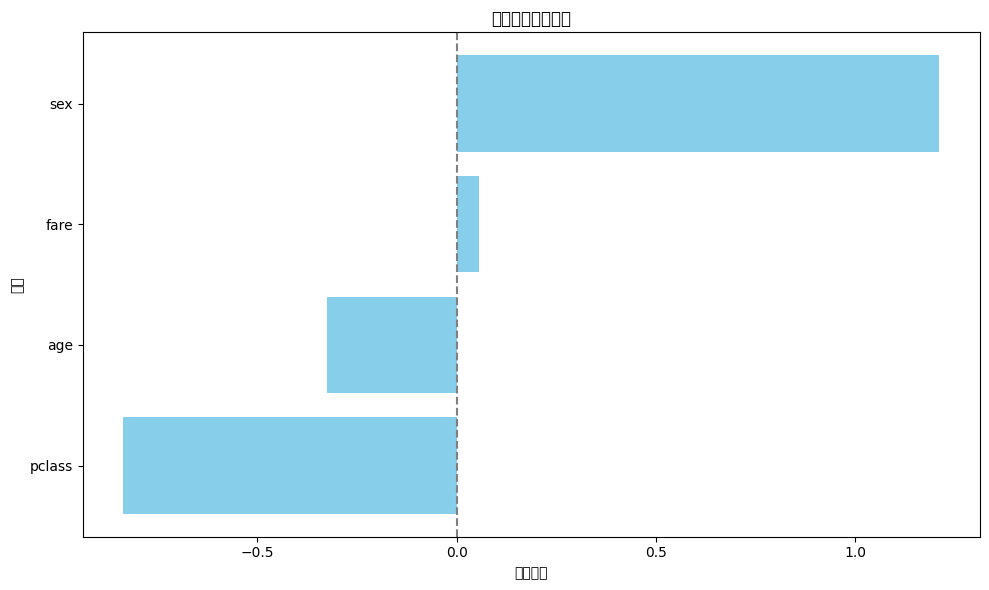


特征重要性解释:
pclass: 系数 = -0.8365 | 该特征增加会减少幸存概率
age: 系数 = -0.3264 | 该特征增加会减少幸存概率
fare: 系数 = 0.0557 | 该特征增加会增加幸存概率
sex: 系数 = 1.2101 | 该特征增加会增加幸存概率


In [ ]:
# 模型解释
feature_names = features
coefs = model_median.coef_[0]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefs, color='skyblue')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('逻辑回归特征系数')
plt.xlabel('系数大小')
plt.ylabel('特征')
plt.tight_layout()
plt.show()

print("\n特征重要性解释:")
for feature, coef in zip(feature_names, coefs):
    print(f"{feature}: 系数 = {coef:.4f}", end=" | ")
    if coef > 0:
        print("该特征增加会增加幸存概率")
    else:
        print("该特征增加会减少幸存概率")

**优点：**
* 简单高效：计算复杂度低，训练速度快

* 可解释性强：特征系数直接反映特征重要性

* 概率输出：预测结果为概率值，便于决策

* 正则化支持：可通过L1/L2正则化防止过拟合

**缺点：**
* 线性决策边界：无法直接处理非线性关系

* 特征相关性敏感：高度相关特征会影响模型稳定性

* 样本不平衡问题：当某一类样本远多于另一类时效果不佳

* 需要特征工程：对异常值、缺失值敏感

**系数解读：**

* 正值：特征增加→幸存概率增加

* 性别（女性）系数最大

* 票价（正相关）

* 负值：特征增加→幸存概率减少

* 舱位等级（Pclass，1为头等舱）

* 年龄（轻微负相关）

## 五：题目

### 基于乘客特征的泰坦尼克幸存预测模型  

#### 1 问题分析  

- 目标：预测乘客幸存概率  
- 关键因素：舱位/年龄/性别等

#### 2 数据预处理  

- 缺失值处理方案（附代码截图）  
- 特征转换方法（如性别数值化）  

#### 3 模型构建  

- 逻辑回归模型原理简述  
- 10行核心训练代码  

#### 4 结果分析  *

- 准确率指标  
- 特征重要性排序（观察模型系数）  